In [24]:
#k
import numpy as np

# Define the function f(x, y)
def f(x, y):
    return x**2 + y**2 - x*y + x - y + 1

# Define the gradients of f(x, y)
def grad_f(x, y):
    df_dx = 2*x - y + 1
    df_dy = 2*y - x - 1
    return np.array([df_dx, df_dy])

# Gradient Descent function
def gradient_descent(learning_rate, initial_guess, max_iters, tolerance):
    x, y = initial_guess
    for _ in range(max_iters):
        grad = grad_f(x, y)
        new_x = x - learning_rate * grad[0]
        new_y = y - learning_rate * grad[1]
        
        if np.sqrt((new_x - x)**2 + (new_y - y)**2) < tolerance:
            break
        
        x, y = new_x, new_y
    
    return x, y

# Parameters
learning_rate = 0.1
initial_guess = (0, 0)
max_iters = 1000
tolerance = 1e-6

# Run gradient descent
min_x, min_y = gradient_descent(learning_rate, initial_guess, max_iters, tolerance)

print(f"Minimum value found at x = {min_x}, y = {min_y}")
print(f"Minimum value of the function is {f(min_x, min_y)}")


Minimum value found at x = -0.33333152943479877, y = 0.33333152943479877
Minimum value of the function is 0.6666666666764288


Function: 2*x + 1
Derivative: 2
Integral value: 66.66666666666669
Absolute error estimate: 7.401486830834379e-13
Fitted parameters: a = 1.9730383453307772 , b = 3.729365701834092


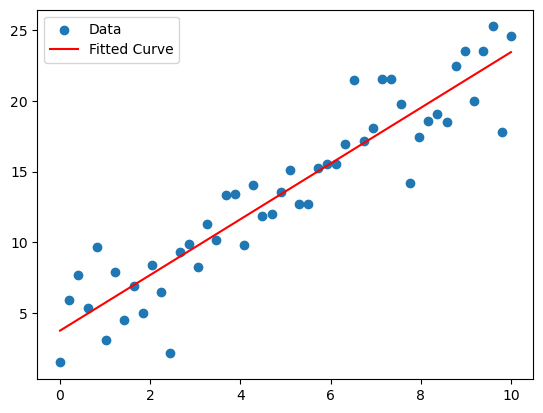

Coefficients: [2.         2.16666667]
Intercept: -3.166666666666667


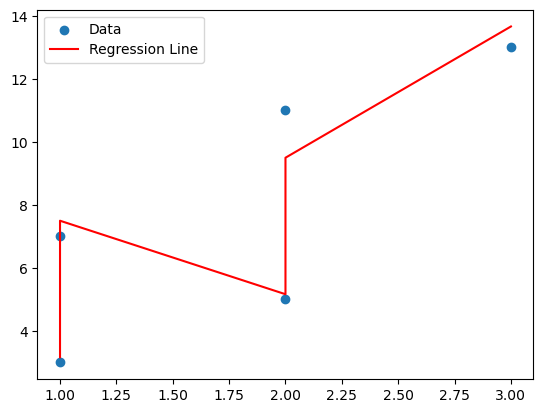

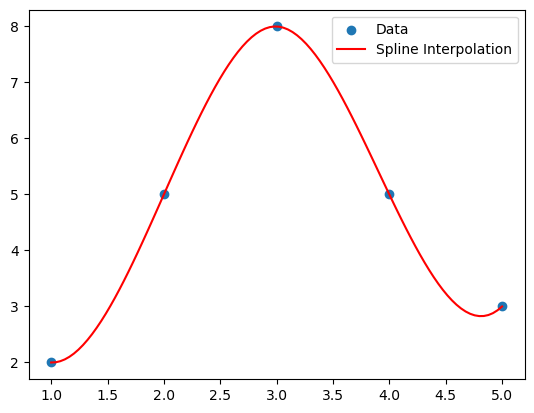

In [30]:
#C
# Differntition

from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
import numpy as np
import sympy as sp

# Define the function
x = sp.Symbol('x')
f = x*3 + 2*x*2 - 5*x + 1

# Differentiate the function
derivative = sp.diff(f, x)

print("Function:", f)
print("Derivative:", derivative)

# Numerical intergration

# Define the function


def f(x):
    return x**2 + 2*x


# Integrate the function from 0 to 5
result, error = quad(f, 0, 5)

print("Integral value:", result)
print("Absolute error estimate:", error)

# Curve Fitting

# Generate sample data
x = np.linspace(0, 10, 50)
y = 2*x + 3 + np.random.normal(0, 2, 50)

# Define the curve fitting function


def linear_func(x, a, b):
    return a*x + b


# Perform curve fitting
popt, pcov = curve_fit(linear_func, x, y)

# Print the fitted parameters
print("Fitted parameters: a =", popt[0], ", b =", popt[1])

# Plot the data and fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x, linear_func(x, *popt), color='r', label='Fitted Curve')
plt.legend()
plt.show()

# Linear Regression

# Generate sample data
x = np.array([[1, 2], [1, 4], [2, 2], [2, 4], [3, 5]])
y = np.array([3, 7, 5, 11, 13])

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions
predictions = model.predict(x)

# Plot the data and regression line
plt.scatter(x[:, 0], y, label='Data')
plt.plot(x[:, 0], predictions, color='r', label='Regression Line')
plt.legend()
plt.show()

# Spine interpolation


# Generate sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 5, 8, 5, 3])

# Create a spline interpolation object
spline = interp1d(x, y, kind='cubic')

# Generate new x values for interpolation
x_new = np.linspace(1, 5, 100)

# Perform spline interpolation
y_new = spline(x_new)

# Plot the original data and interpolated curve
plt.scatter(x, y, label='Data')
plt.plot(x_new, y_new, color='r', label='Spline Interpolation')
plt.legend()
plt.show()

Approximate integral of sin(x) from 0 to 3.141592653589793 using 10 trapezoids is 1.9835235375094546


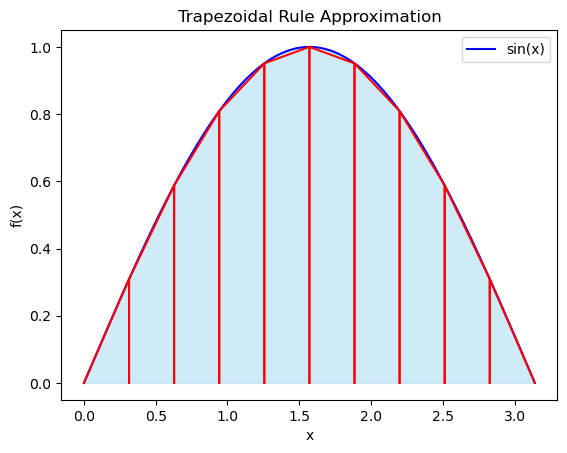

In [28]:
#G
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)  # Example function

def trapezoidal_rule(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:n]) + y[n])
    return integral

# Parameters
a = 0  # Start of the interval
b = np.pi  # End of the interval
n = 10  # Number of trapezoids

# Calculate the integral
integral = trapezoidal_rule(a, b, n)

# Print the result
print(f"Approximate integral of sin(x) from {a} to {b} using {n} trapezoids is {integral}")

# Plotting
x = np.linspace(a, b, 1000)
y = f(x)

plt.plot(x, y, 'b', label='sin(x)')
plt.fill_between(x, 0, y, color='skyblue', alpha=0.4)

# Plot trapezoids
x_trap = np.linspace(a, b, n+1)
y_trap = f(x_trap)

for i in range(n):
    plt.plot([x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]], [0, y_trap[i], y_trap[i+1], 0], 'r')

plt.title('Trapezoidal Rule Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


In [32]:
import numpy as np

def lagrange_interpolation(x, y):
    def L(i, x_val):
        n = len(x)
        result = 1.0
        for j in range(n):
            if j != i:
                result *= (x_val - x[j]) / (x[i] - x[j])
        return result
    
    def P(x_val):
        n = len(x)
        return sum(y[i] * L(i, x_val) for i in range(n))
    
    # Compute coefficients
    coeffs = np.polyfit(x, [P(xi) for xi in x], len(x)-1)
    return coeffs[::-1]  # Reverse to get ascending order of powers

# Example usage
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
coefficients = lagrange_interpolation(x, y)
print("Lagrange polynomial coefficients:", coefficients)

Lagrange polynomial coefficients: [ 3.42633673e-14 -2.68014957e-14  1.00000000e+00 -5.97595060e-16]


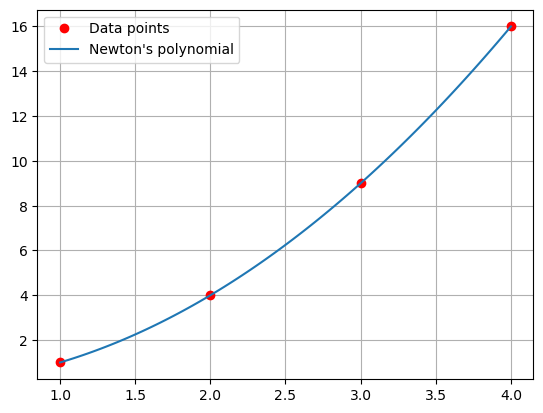

In [34]:
import numpy as np

def newton_divided_difference(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0]

def newton_interpolation(x, y):
    coef = newton_divided_difference(x, y)
    
    def P(x_val):
        n = len(x) - 1
        p = coef[n]
        for k in range(1, n+1):
            p = coef[n-k] + (x_val - x[n-k])*p
        return p
    
    return P

# Given data points
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

# Create the interpolating polynomial
P = newton_interpolation(x, y)

# Test the polynomial
x_test = np.linspace(1, 4, 100)
y_test = [P(xi) for xi in x_test]

# Plot the results
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro', label='Data points')
plt.plot(x_test, y_test, label="Newton's polynomial")
plt.legend()
plt.grid(True)
plt.show()

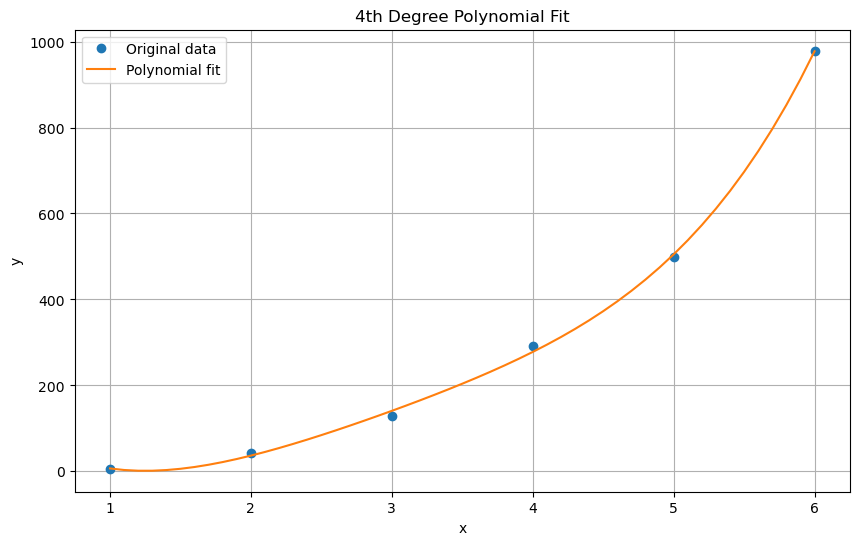

Polynomial coefficients (highest degree first):
[   4.105625    -47.96069444  222.25979167 -362.74531746  191.125     ]


In [36]:
#The output would be a graph showing the original data points and the fitted polynomial curve.
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([5.5, 43.1, 128, 290.7, 498.4, 978.67])

# Fit a 4th degree polynomial
p = np.polyfit(x, y, 4)

# Create a smoother set of x-values for the fitted curve
x2 = np.linspace(1, 6, 51)  # 51 points from 1 to 6

# Evaluate the fitted polynomial at the new x-values
y2 = np.polyval(p, x2)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Original data')  # Original points
plt.plot(x2, y2, '-', label='Polynomial fit')  # Fitted curve
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('4th Degree Polynomial Fit')
plt.legend()

# Show the plot
plt.show()

# Print the polynomial coefficients
print("Polynomial coefficients (highest degree first):")
print(p)

In [38]:
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    sum = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        x = a + i * h
        sum += f(x)
    return h * sum

# Example usage
def f(x):
    return x**2  # Example function to integrate

a, b = 0, 1  # Integration limits
n = 1000  # Number of subintervals

result = trapezoidal_rule(f, a, b, n)
print(f"The approximate integral of x^2 from {a} to {b} is: {result:.6f}")

The approximate integral of x^2 from 0 to 1 is: 0.333333


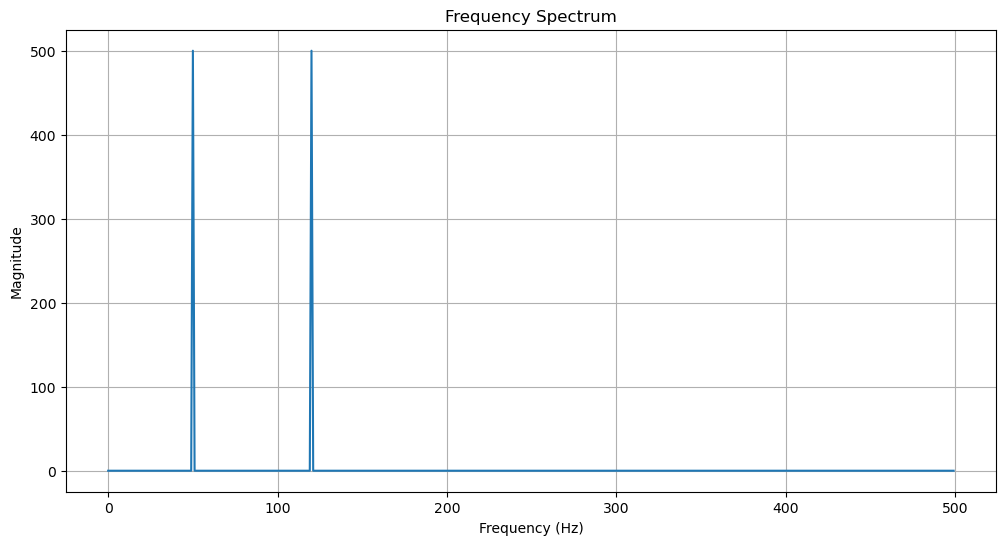

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_signal(f1, f2, sample_rate, duration):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
    
    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(t), 1/sample_rate)
    
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(frequencies)//2])
    plt.title('Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Parameters
f1, f2 = 50, 120  # Hz
sample_rate = 1000  # Hz
duration = 1  # second

analyze_signal(f1, f2, sample_rate, duration)

In [42]:
def f(x):
    return x**3 - 0.165*x**2 + 3.993e-4

def f_prime(x):
    return 3*x**2 - 0.33*x

def newton_method(x0, iterations):
    x = x0
    for i in range(iterations):
        fx = f(x)
        fpx = f_prime(x)
        x_new = x - fx / fpx
        error = abs((x_new - x) / x_new)
        
        print(f"Iteration {i+1}: x = {x_new:.6f}, f(x) = {f(x_new):.6f}, error = {error:.6f}")
        
        x = x_new
    
    return x

# Initial guess
x0 = 0.1

# Perform 3 iterations
result = newton_method(x0, 3)
print(f"Final approximation: x = {result:.6f}")

Iteration 1: x = 0.016433, f(x) = 0.000359, error = 5.085193
Iteration 2: x = 0.094298, f(x) = -0.000229, error = 0.825731
Iteration 3: x = 0.042656, f(x) = 0.000177, error = 1.210688
Final approximation: x = 0.042656


In [44]:
import numpy as np

def linear_interpolation(x, x0, x1, y0, y1):
    return y0 + (x - x0) * (y1 - y0) / (x1 - x0)

# Given data
x = np.array([2.00, 4.25, 5.25, 7.81, 9.20, 10.60])
y = np.array([7.2, 7.1, 6.0, 5.0, 3.5, 5.0])

# Find the appropriate interval for x = 4.0
for i in range(len(x) - 1):
    if x[i] <= 4.0 <= x[i+1]:
        x0, x1 = x[i], x[i+1]
        y0, y1 = y[i], y[i+1]
        break

# Calculate y at x = 4.0
y_interpolated = linear_interpolation(4.0, x0, x1, y0, y1)

print(f"The interpolated y value at x = 4.0 is: {y_interpolated:.4f}")

The interpolated y value at x = 4.0 is: 7.1111


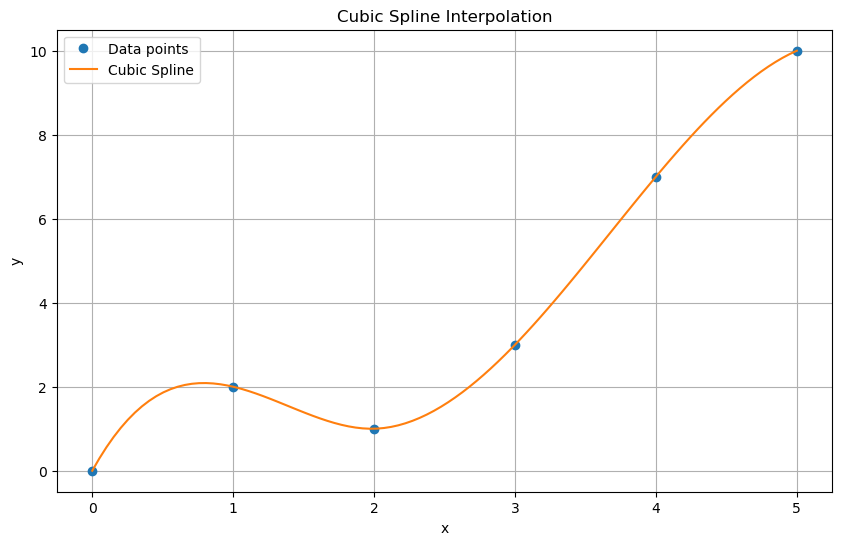

Value at x = 2.5: 1.575


In [46]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Generate some data
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 2, 1, 3, 7, 10])

# Create cubic spline
cs = interpolate.CubicSpline(x, y)

# Generate points for smooth curve
xs = np.linspace(0, 5, 100)
ys = cs(xs)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data points')
plt.plot(xs, ys, label='Cubic Spline')
plt.legend()
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Evaluate spline at a specific point
x_eval = 2.5
y_eval = cs(x_eval)
print(f"Value at x = {x_eval}: {y_eval}")

In [48]:
import numpy as np

def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (b - a) / (2 * n) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

def simpson_rule(f, a, b, n):
    if n % 2 != 0:
        n += 1
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (b - a) / (3 * n) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]) + y[-1])

# Example usage
def f(x):
    return np.sin(x)

a, b = 0, np.pi
n = 100

print(f"Trapezoidal Rule: {trapezoidal_rule(f, a, b, n)}")
print(f"Simpson's Rule: {simpson_rule(f, a, b, n)}")
print(f"Actual value: {-np.cos(np.pi) + np.cos(0)}")

Trapezoidal Rule: 1.9998355038874436
Simpson's Rule: 2.0000000108245035
Actual value: 2.0


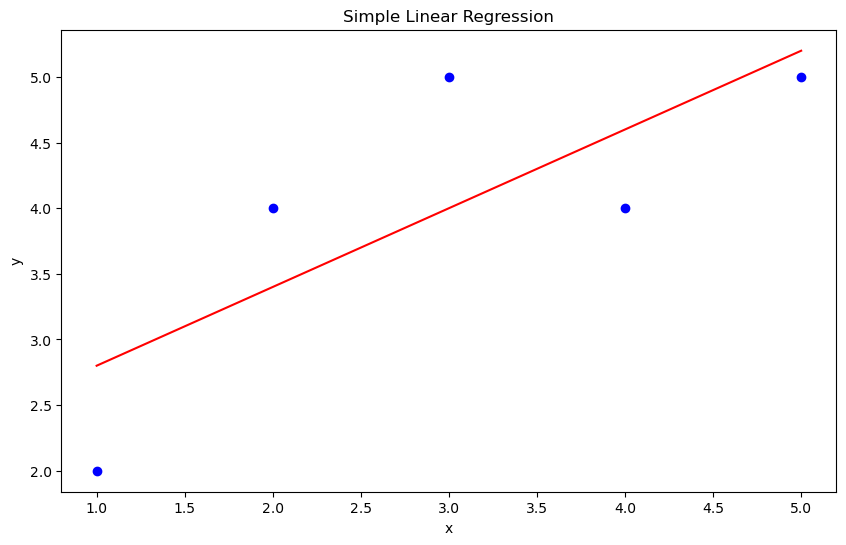

Simple Linear Regression: y = 2.20 + 0.60x

Multiple Linear Regression:
y = 1.00 + 0.00x1 + 1.00x2


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simple Linear Regression
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

model = LinearRegression()
model.fit(x, y)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title('Simple Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(f"Simple Linear Regression: y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x")

# Multiple Linear Regression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [3, 3], [3, 4], [4, 4], [4, 5]])
Y = np.array([2, 3, 3, 4, 4, 5, 5, 6])

model = LinearRegression()
model.fit(X, Y)

print("\nMultiple Linear Regression:")
print(f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x1 + {model.coef_[1]:.2f}x2")

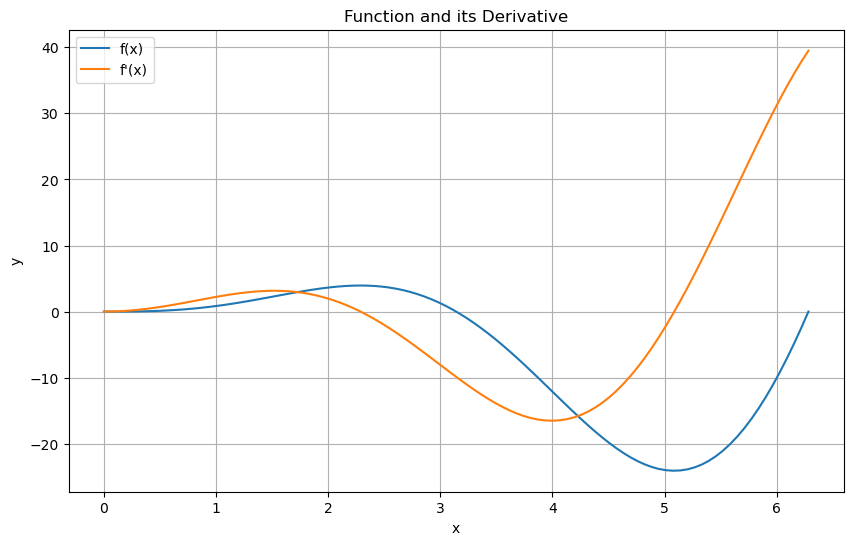

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Example function
def f(x):
    return x**2 * np.sin(x)

# Calculate derivative
x = np.linspace(0, 2*np.pi, 100)
y = f(x)
dy_dx = numerical_derivative(f, x)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.plot(x, dy_dx, label="f'(x)")
plt.legend()
plt.title('Function and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

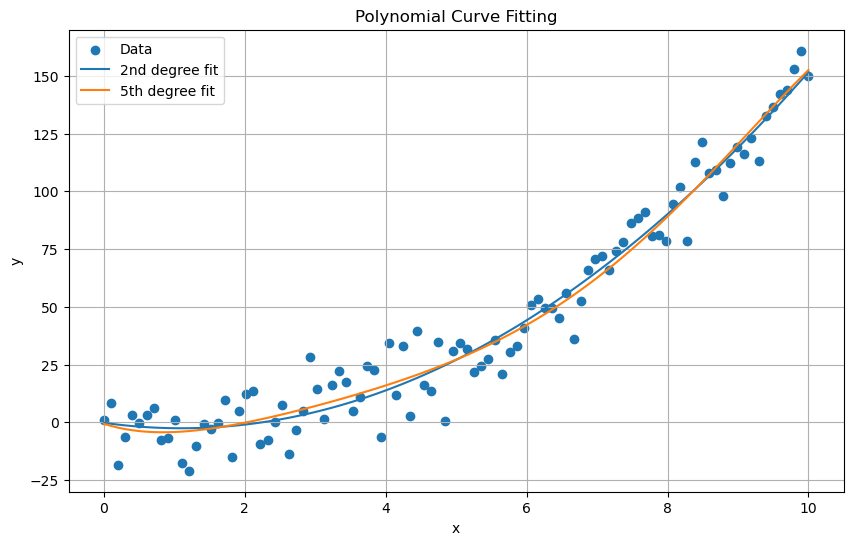

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def polynomial_fit(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    return p

# Generate some noisy data
x = np.linspace(0, 10, 100)
y = 2 * x**2 - 5 * x + 3 + np.random.normal(0, 10, 100)

# Fit polynomials of different degrees
p2 = polynomial_fit(x, y, 2)
p5 = polynomial_fit(x, y, 5)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, p2(x), label='2nd degree fit')
plt.plot(x, p5(x), label='5th degree fit')
plt.legend()
plt.title('Polynomial Curve Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [56]:
def f(x):
    return x**2 - x - 2

def regula_falsi(a, b, iterations):
    for i in range(iterations):
        fa = f(a)
        fb = f(b)
        x = (a * fb - b * fa) / (fb - fa)
        fx = f(x)
        
        print(f"Iteration {i+1}: x = {x:.6f}, f(x) = {fx:.6f}")
        
        if fx * fa < 0:
            b = x
        else:
            a = x
    
    return x

# Initial guesses
a, b = 1, 3

# Perform 3 iterations
result = regula_falsi(a, b, 3)
print(f"Final approximation: x = {result:.6f}")

Iteration 1: x = 1.666667, f(x) = -0.888889
Iteration 2: x = 1.909091, f(x) = -0.264463
Iteration 3: x = 1.976744, f(x) = -0.069227
Final approximation: x = 1.976744
